In [1]:
import pandas as pd
import numpy as np

subpath = "distrib_experiment_y_original/2024-12-24T17:02:52"
data = pd.read_csv(f'{subpath}/total_X.csv')


In [5]:
data.drop(columns=['Unnamed: 6'], inplace=True)

In [25]:
group = data.groupby(["período"])['nmae'].agg(['mean', 'std']).reset_index()

In [26]:
group['std'] = round(100*group['std'], 0)
group['mean'] = round(100*group['mean'], 0)

In [27]:
group

,período,mean,std
0,8,12.0,3.0
1,16,12.0,2.0
2,32,13.0,3.0
3,64,13.0,2.0
4,128,12.0,3.0
5,256,14.0,4.0


In [28]:
new_data = pd.DataFrame({'período': [1], 'mean': [12], 'std': [2]})

total_table = pd.concat([group, new_data], ignore_index=True)


In [29]:
total_table.set_index('período', inplace=True)

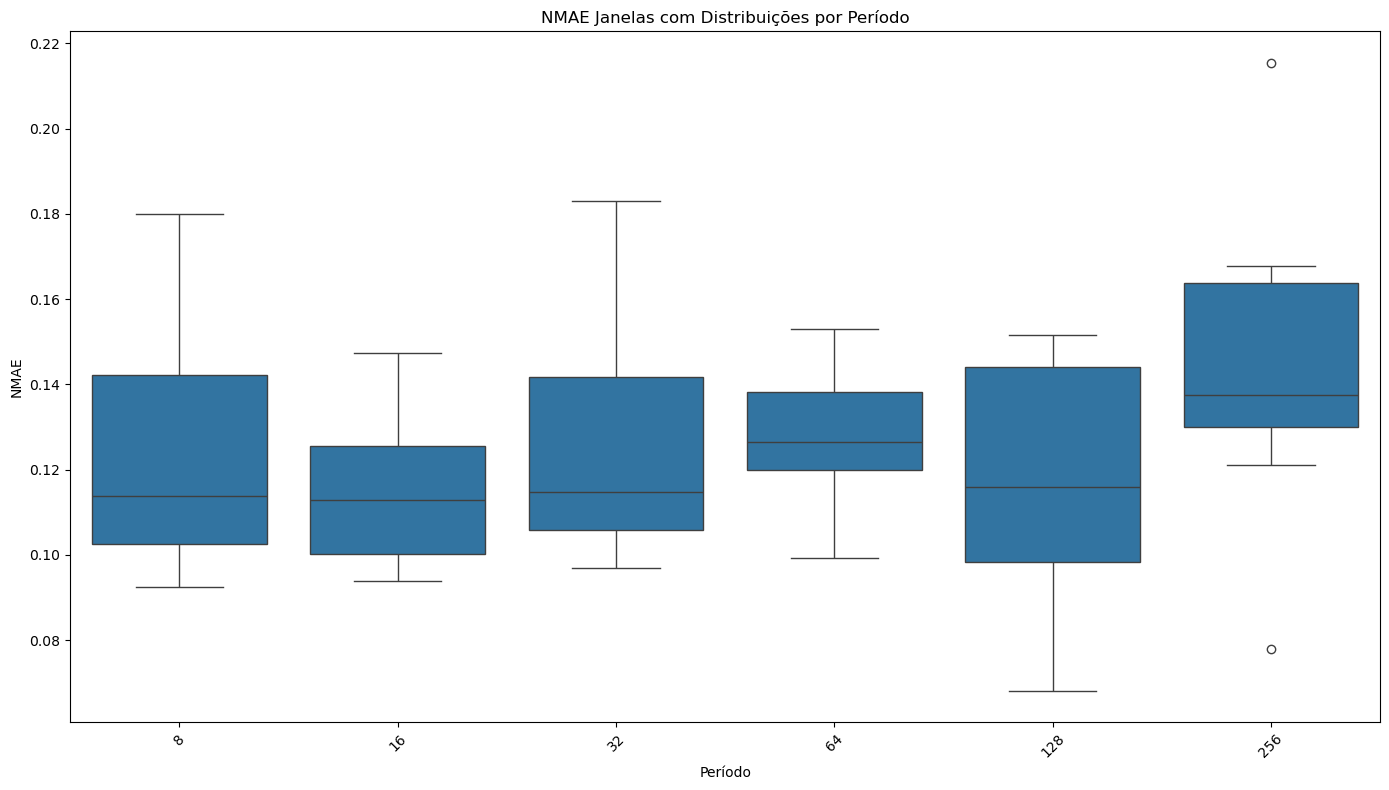

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.boxplot(x='período', y='nmae', data=data)

plt.xlabel("Período")
plt.ylabel("NMAE")
plt.title("NMAE Janelas com Distribuições por Período")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [34]:
group_by_method = data.groupby(["período", "método"])['nmae'].agg(['mean', 'std']).reset_index()

In [36]:
group_by_method['std'] = round(100*group_by_method['std'], 0)
group_by_method['mean'] = round(100*group_by_method['mean'], 0)

In [37]:
group_by_method

,período,método,mean,std
0,8,RF,11.0,2.0
1,8,RT,13.0,4.0
2,16,RF,11.0,2.0
3,16,RT,12.0,2.0
4,32,RF,12.0,3.0
5,32,RT,13.0,4.0
6,64,RF,12.0,2.0
7,64,RT,13.0,2.0
8,128,RF,12.0,3.0
9,128,RT,11.0,3.0


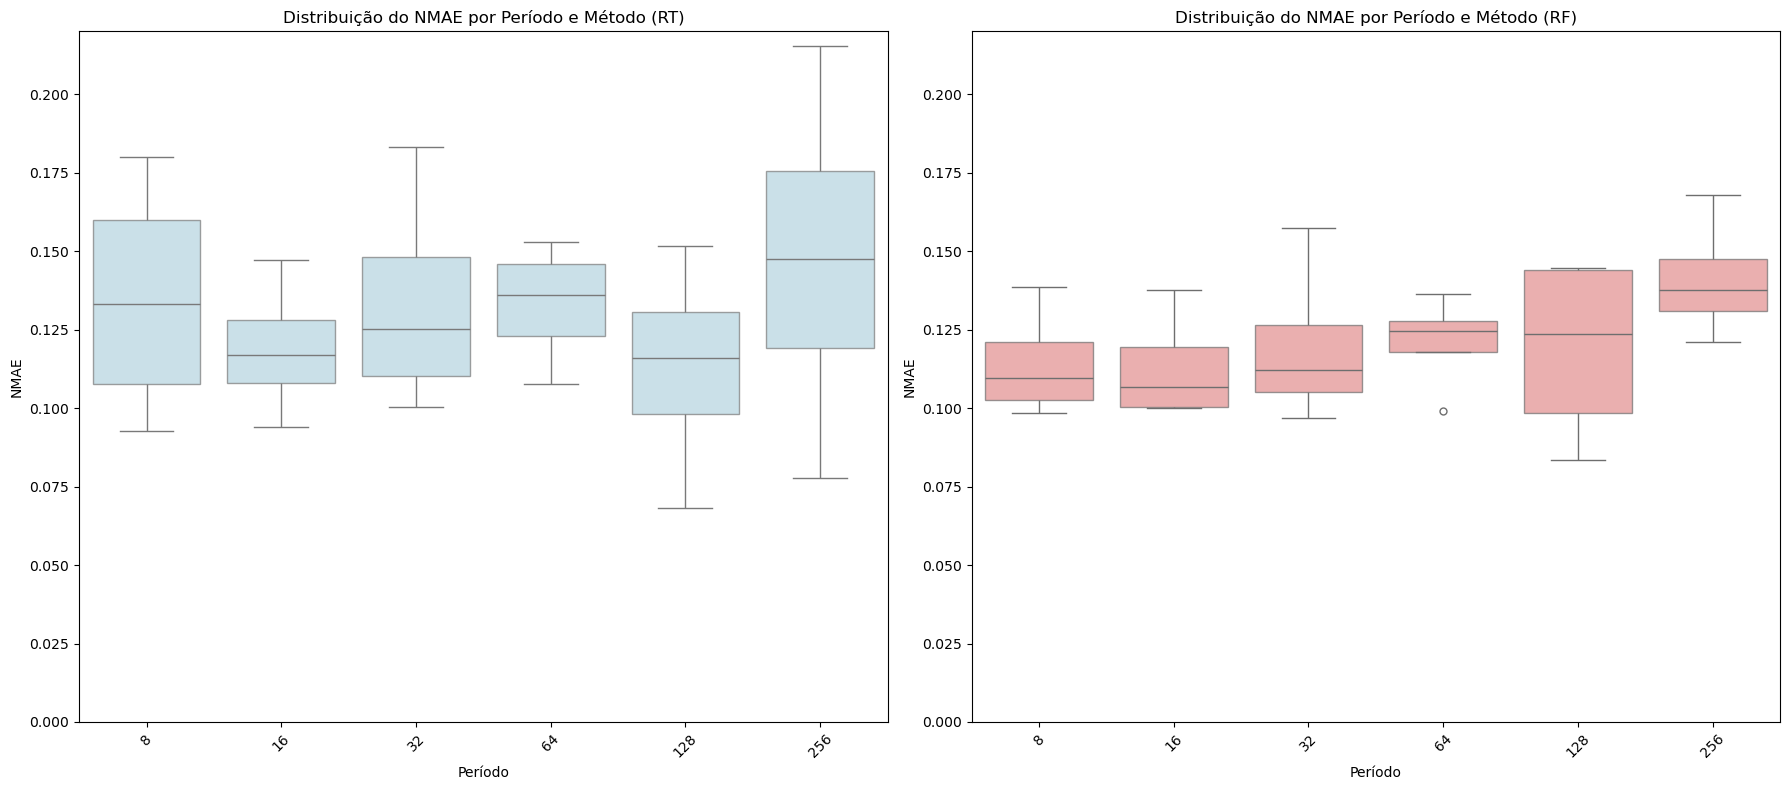

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

y_limits = (0, 0.22)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RT'],
            color="lightblue", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[0])
axes[0].set_ylim(y_limits)
axes[0].set_xlabel("Período")
axes[0].set_ylabel("NMAE")
axes[0].set_title("Distribuição do NMAE por Período e Método (RT)")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RF'],
            color="lightcoral", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[1])
axes[1].set_ylim(y_limits)
axes[1].set_xlabel("Período")
axes[1].set_ylabel("NMAE")
axes[1].set_title("Distribuição do NMAE por Período e Método (RF)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()
